In [2]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [3]:
from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import train_test_split # train and test 
from sklearn import metrics
#from sklearn import preprocessing
from sklearn.metrics import classification_report 

In [4]:
# loading the data
banks=pd.read_csv('bankfull.csv',sep=';')
banks

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [5]:
banks.isnull().sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [6]:
banks.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
# Droping unwanted columns
banks.drop(['job','marital','education','default','contact','day','month','duration','campaign','pdays','previous','poutcome'],inplace=True,axis=1)


In [10]:
banks


,age,balance,housing,loan,y
0,58,2143,1,0,0
1,44,29,1,0,0
2,33,2,1,1,0
3,47,1506,1,0,0
4,33,1,0,0,0
...,...,...,...,...,...
45206,51,825,0,0,1
45207,71,1729,0,0,1
45208,72,5715,0,0,1
45209,57,668,0,0,0


In [11]:
#Converting yes=1 and no=0
banks = banks.replace(to_replace = "yes", value = 1)
banks = banks.replace(to_replace = "no", value = 0)
banks

,age,balance,housing,loan,y
0,58,2143,1,0,0
1,44,29,1,0,0
2,33,2,1,1,0
3,47,1506,1,0,0
4,33,1,0,0,0
...,...,...,...,...,...
45206,51,825,0,0,1
45207,71,1729,0,0,1
45208,72,5715,0,0,1
45209,57,668,0,0,0


In [28]:
pd.crosstab(banks.y,banks.loan) 

loan,0,1
y,,
0,33162,6760
1,4805,484


In [12]:

from sklearn.linear_model import LogisticRegression
banks.shape 

(45211, 5)

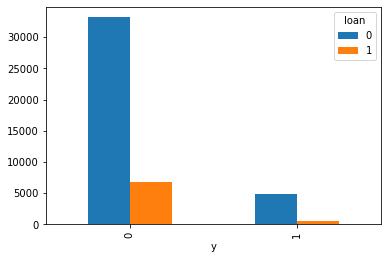

In [29]:
pd.crosstab(banks.y,banks.loan).plot(kind = 'bar') 

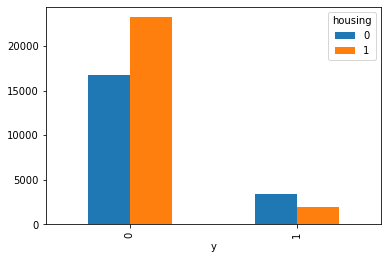

In [30]:
pd.crosstab(banks.y,banks.housing).plot(kind = 'bar') 

In [13]:
# Model building 
X = banks.iloc[:,0:3]
Y = banks.iloc[:,4]
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [14]:
classifier.coef_   # coefficients of features

array([[-2.38640001e-02,  3.04113023e-05, -1.15883017e+00]])

In [15]:
classifier.predict_proba (X)

array([[0.95232455, 0.04767545],
       [0.9384675 , 0.0615325 ],
       [0.92150692, 0.07849308],
       ...,
       [0.88706701, 0.11293299],
       [0.8649062 , 0.1350938 ],
       [0.78740177, 0.21259823]])

In [16]:
y_pred = classifier.predict(X)
banks["y_pred"] = y_pred
banks  

,age,balance,housing,loan,y,y_pred
0,58,2143,1,0,0,0
1,44,29,1,0,0,0
2,33,2,1,1,0,0
3,47,1506,1,0,0,0
4,33,1,0,0,0,0
...,...,...,...,...,...,...
45206,51,825,0,0,1,0
45207,71,1729,0,0,1,0
45208,72,5715,0,0,1,0
45209,57,668,0,0,0,0


In [17]:
y_prob = pd.DataFrame(classifier.predict_proba(X))
new_df = pd.concat([banks,y_prob],axis=1)
new_df 


,age,balance,housing,loan,y,y_pred,0,1
0,58,2143,1,0,0,0,0.952325,0.047675
1,44,29,1,0,0,0,0.938467,0.061533
2,33,2,1,1,0,0,0.921507,0.078493
3,47,1506,1,0,0,0,0.939990,0.060010
4,33,1,0,0,0,0,0.786541,0.213459
...,...,...,...,...,...,...,...,...
45206,51,825,0,0,1,0,0.846667,0.153333
45207,71,1729,0,0,1,0,0.896459,0.103541
45208,72,5715,0,0,1,0,0.887067,0.112933
45209,57,668,0,0,0,0,0.864906,0.135094


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39912    10]
 [ 5289     0]]


In [19]:
pd.crosstab(y_pred,Y) 

y,0,1
row_0,,
0,39912,5289
1,10,0


In [20]:
accuracy = sum(Y==y_pred)/banks.shape[0]
accuracy

0.8827940103072262

In [21]:
from sklearn.metrics import classification_report 
print (classification_report (Y, y_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94     39922
           1       0.00      0.00      0.00      5289

    accuracy                           0.88     45211
   macro avg       0.44      0.50      0.47     45211
weighted avg       0.78      0.88      0.83     45211



In [22]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
Logit_roc_score=roc_auc_score(Y,classifier.predict(X))
Logit_roc_score 

0.49987475577375884

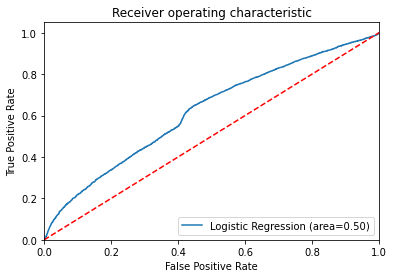

In [23]:
fpr, tpr, thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1]) 
plt.plot(fpr, tpr, label='Logistic Regression (area=%0.2f)'% Logit_roc_score)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()  

In [24]:
y_prob1 = pd.DataFrame(classifier.predict_proba(X)[:,0]) 
y_prob1

,0
0,0.952325
1,0.938467
2,0.921507
3,0.939990
4,0.786541
...,...
45206,0.846667
45207,0.896459
45208,0.887067
45209,0.864906


In [25]:
fpr 

array([0.00000000e+00, 2.50488452e-05, 2.75537298e-04, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [27]:
tpr

array([0.        , 0.        , 0.        , ..., 0.99943279, 0.99981093,
       1.        ])